In [15]:
"""
Created on: Wed. 5 Oct. 2022
Author: Mélina Verger

Test the models and return their accuracies and feature importance.
"""

# For data manipulation
import pandas as pd

# To load the trained models
import pickle

# For cross-validation
from sklearn.model_selection import cross_val_score

# Metric
from sklearn.metrics import accuracy_score

# Plotting module
import matplotlib.pyplot as plt

## Load data sets and trained models

In [16]:
DATA = pickle.load(open("../data/DATA", "rb"))
SPLIT = pickle.load(open("../data/SPLIT", "rb"))

print(DATA)
print(SPLIT)

stAll
7030


In [17]:
# Load train and test sets

X_train = pd.read_csv("../data/X_train" + "_" + DATA + "_" + SPLIT + ".csv")
X_test = pd.read_csv("../data/X_test" + "_" + DATA + "_" + SPLIT + ".csv")
y_train = pd.read_csv("../data/y_train" + "_" + DATA + "_" + SPLIT + ".csv")
y_test = pd.read_csv("../data/y_test" + "_" + DATA + "_" + SPLIT + ".csv")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [18]:
# Load trained models

clf_lr = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_lr", "rb"))
clf_svc = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_svc", "rb"))
clf_knearest = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_knearest", "rb"))
clf_dt = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_dt", "rb"))
clf_rf = pickle.load(open("../models/" + DATA + "_" + SPLIT + "_clf_rf", "rb"))

## Accuracies on train and test sets

In [19]:
NB_FOLD = 5

In [20]:
scores_train_lr = cross_val_score(clf_lr, X_train, y_train, cv=NB_FOLD)
print("Accuracy on the train set with cross-validation: %0.2f with a standard deviation of %0.2f" % (scores_train_lr.mean(), scores_train_lr.std()))
print(f"Accuracy on the test set: {round(accuracy_score(y_test, clf_lr.predict(X_test)), 2)}")

Accuracy on the train set with cross-validation: 0.77 with a standard deviation of 0.01
Accuracy on the test set: 0.76


In [21]:
scores_train_svc = cross_val_score(clf_svc, X_train, y_train, cv=NB_FOLD)
print("Accuracy on the train set with cross-validation: %0.2f with a standard deviation of %0.2f" % (scores_train_svc.mean(), scores_train_svc.std()))
print(f"Accuracy on the test set: {round(accuracy_score(y_test, clf_svc.predict(X_test)), 2)}")

Accuracy on the train set with cross-validation: 0.79 with a standard deviation of 0.02
Accuracy on the test set: 0.77


In [22]:
scores_train_knearest = cross_val_score(clf_knearest, X_train, y_train, cv=NB_FOLD)
print("Accuracy on the train set with cross-validation: %0.2f with a standard deviation of %0.2f" % (scores_train_knearest.mean(), scores_train_knearest.std()))
print(f"Accuracy on the test set: {round(accuracy_score(y_test, clf_knearest.predict(X_test)), 2)}")

Accuracy on the train set with cross-validation: 0.75 with a standard deviation of 0.02
Accuracy on the test set: 0.74


/Users/melinaverger/Desktop/exp2/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/melinaverger/Desktop/exp2/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value

In [23]:
scores_train_dt = cross_val_score(clf_dt, X_train, y_train, cv=NB_FOLD)
print("Accuracy on the train set with cross-validation: %0.2f with a standard deviation of %0.2f" % (scores_train_dt.mean(), scores_train_dt.std()))
print(f"Accuracy on the test set: {round(accuracy_score(y_test, clf_dt.predict(X_test)), 2)}")

Accuracy on the train set with cross-validation: 0.75 with a standard deviation of 0.02
Accuracy on the test set: 0.72


In [24]:
scores_train_rf = cross_val_score(clf_rf, X_train, y_train, cv=NB_FOLD)
print("Accuracy on the train set with cross-validation: %0.2f with a standard deviation of %0.2f" % (scores_train_rf.mean(), scores_train_rf.std()))
print(f"Accuracy on the test set: {round(accuracy_score(y_test, clf_rf.predict(X_test)), 2)}")

Accuracy on the train set with cross-validation: 0.80 with a standard deviation of 0.02
Accuracy on the test set: 0.78


## Feature importance (FI)

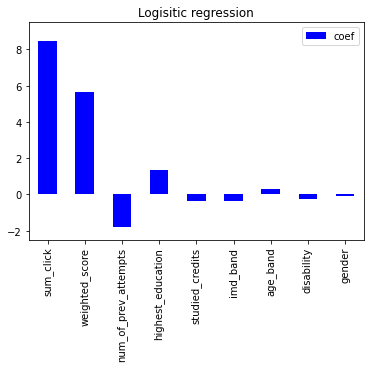

In [25]:
pd.DataFrame(clf_lr.coef_, columns=X_train.columns, index=["coef"]).T.sort_values(by='coef', axis=0, ascending=False, key=abs).plot.bar(color='b')
plt.title("Logisitic regression")

if DATA == "stInfo":
    plt.ylim((-2.5,2))
elif DATA == "stAll":
    plt.ylim((-2.5,9.5))

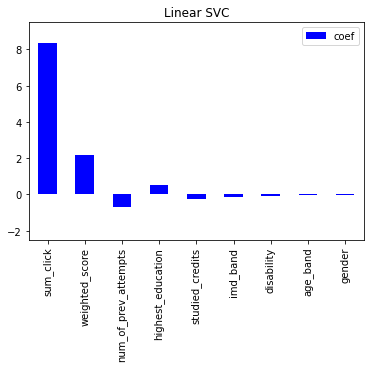

In [26]:
pd.DataFrame(clf_svc.coef_, columns=X_train.columns, index=["coef"]).T.sort_values(by='coef', axis=0, ascending=False, key=abs).plot.bar(color='b')
plt.title("Linear SVC")

if DATA == "stInfo":
    plt.ylim((-2.5,2))
elif DATA == "stAll":
    plt.ylim((-2.5,9.5))

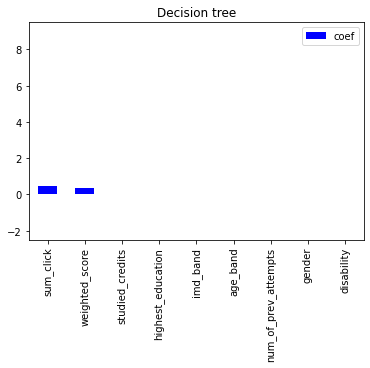

In [27]:
pd.DataFrame(clf_dt.feature_importances_, index=X_train.columns, columns=["coef"]).sort_values(by='coef', axis=0, ascending=False, key=abs).plot.bar(color='b')
plt.title("Decision tree")

if DATA == "stInfo":
    plt.ylim((-2.5,2))
elif DATA == "stAll":
    plt.ylim((-2.5,9.5))

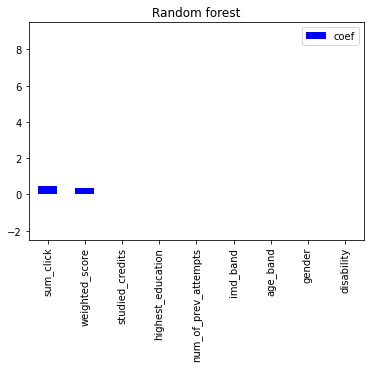

In [28]:
pd.DataFrame(clf_rf.feature_importances_, index=X_train.columns, columns=["coef"]).sort_values(by='coef', axis=0, ascending=False, key=abs).plot.bar(color='b')
plt.title("Random forest")

if DATA == "stInfo":
    plt.ylim((-2.5,2))
elif DATA == "stAll":
    plt.ylim((-2.5,9.5))